<a href="https://colab.research.google.com/github/felixgper/Marketing-kidhome/blob/master/kid_home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Proyecto: Análisis de datos del conjunto de datos **

---

## Descripción

Este es uno de mis primeros proyectos como analista de datos, me he puesto como objetivo comparar entre las distintas maneras que uno tiene para hacer la clausterizacion en sus datos, asi mismo, poder elegir lo que mejor funciona al proyecto.

En conjunto con esto, se buscara compartir el conocimiento adquirido, como mejorar la toma de desiciones futuras.

---

## Preguntas/Problema que buscamos resolver

El objetivo principal es conocer las distintas maneras que se tiene para hacer una buena clausterizacion, entre ello nos haremos las sguientes preguntas:

- ¿Influye el tener un niño en casa del cliente con la compras en tienda fisica?
- ¿Influye el tener un niño en casa del cliente con la compras en tienda virtual?
- ¿Tener un niño en casa aumenta en la compra de productos con dulce?
- ¿Qué tan precisos son los modelos de predicción para identificar que tanto influye tener un niño en casa?

Este proyecto está dirigido a cualquier persona interesada en aprender técnicas de análisis de datos y modelado predictivo. También podría ser útil para gerentes de empresas de servicios interesados en identificar los factores que influyen en la compra de víveres, segun tengan un niño en casa.

---



Autor: Felix Gonzales Servan

Contacto: felixgonzales94@gmail.com

# **2. IMPORTACION DE LIBRERIAS**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from itertools import product
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc

In [2]:
uploaded = files.upload()

Saving marketing.csv to marketing.csv


In [3]:
print(uploaded.keys())


dict_keys(['marketing.csv'])


In [4]:
df = pd.read_csv(next(iter(uploaded)), delimiter='\t')

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = [
    '#4C72B0',  # Azul
    '#55A868',  # Verde
    '#C44E52',  # Rojo
    '#8172B2',  # Morado
    '#CCB974',  # Amarillo
    '#64B5CD',  # Azul claro
]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# **3. ANALISIS EXPLORATORIO DE DATOS**

---

Las variables del conjunto son:
* ID: Identificador único para cada cliente.
*Year_Birth: Año de nacimiento del cliente.
*Education: Nivel educativo del cliente (por ejemplo, Graduado, PhD, etc.).
*Marital_Status: Estado civil del cliente (por ejemplo, Soltero, Casado, etc.).
*Income: Ingreso anual del cliente.
*Kidhome: Número de niños en el hogar del cliente.
*Teenhome: Número de adolescentes en el hogar del cliente.
*Dt_Customer: Fecha en la que el cliente se convirtió en cliente.
*Recency: Número de días desde la última compra del cliente.
*MntWines: Gasto del cliente en vinos.
*MntFruits: Gasto del cliente en frutas.
*MntMeatProducts: Gasto del cliente en productos cárnicos.
*MntFishProducts: Gasto del cliente en productos de pescado.
*MntSweetProducts: Gasto del cliente en productos dulces.
*MntGoldProds: Gasto del cliente en productos de oro.
*NumDealsPurchases: Número de compras realizadas con descuento.
*NumWebPurchases: Número de compras realizadas a través de la web.
*NumCatalogPurchases: Número de compras realizadas a través de catálogos.
*NumStorePurchases: Número de compras realizadas en tiendas físicas.
*NumWebVisitsMonth: Número de visitas a sitios web por mes.
*AcceptedCmp3: Si el cliente aceptó la Campaña 3.
*AcceptedCmp4: Si el cliente aceptó la Campaña 4.
*AcceptedCmp5: Si el cliente aceptó la Campaña 5.
*AcceptedCmp1: Si el cliente aceptó la Campaña 1.
*AcceptedCmp2: Si el cliente aceptó la Campaña 2.
*Complain: Si el cliente presentó una queja.
*Z_CostContact: Costo de contacto.
*Z_Revenue: Ingresos generados por el contacto.
*Response: Respuesta del cliente a una campaña (variable objetivo).

# 3.1 Informacion general sobre el conjunto de datos.

In [7]:
# Tamaño del conjunto de datos
tamaño = df.shape
print('Index, columns :', tamaño)

print('-----------------------------------------------------------------------')
# Valores duplicados
print('\nValores duplicados: \n',df[df.duplicated()])

print('-----------------------------------------------------------------------')
# Nombre de las variables
print('\nNombre de las columnas: \n',df.columns)

print('-----------------------------------------------------------------------')
# Tipos de datos de cada variable
print('\nTipos de datos: \n', df.dtypes)

print('-----------------------------------------------------------------------')
# Verificar la presencia de valores faltantes
print('\nValores falantes: \n', df.isnull().sum())

print('-----------------------------------------------------------------------')
# Estadísticas descriptivas de las variables numéricas

# Aplicar describe() a las columnas numéricas
description = df.describe(include=[np.number])

# Redondear los valores en el DataFrame resultante a dos decimales
rounded_description = description.round(decimals=2)

print("\nEstadísticas descriptivas: \n", rounded_description)

print('-----------------------------------------------------------------------')
# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())

Index, columns : (2240, 29)
-----------------------------------------------------------------------

Valores duplicados: 
 Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]
-----------------------------------------------------------------------

Nombre de las columnas: 
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', '

In [8]:
# De los resultados podemos apreciar que tenemos a Income con 24 valores faltantes, pero no se le eliminara porque en las demas columnas tenemos datos importantes.
# Lo que haremos será que en cada espacio vacio o nulo que haya, se le colocará la mediana de estos.
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
df['Income'] = df['Income'].astype(float)
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [9]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# 3.2. Analisis de distribución

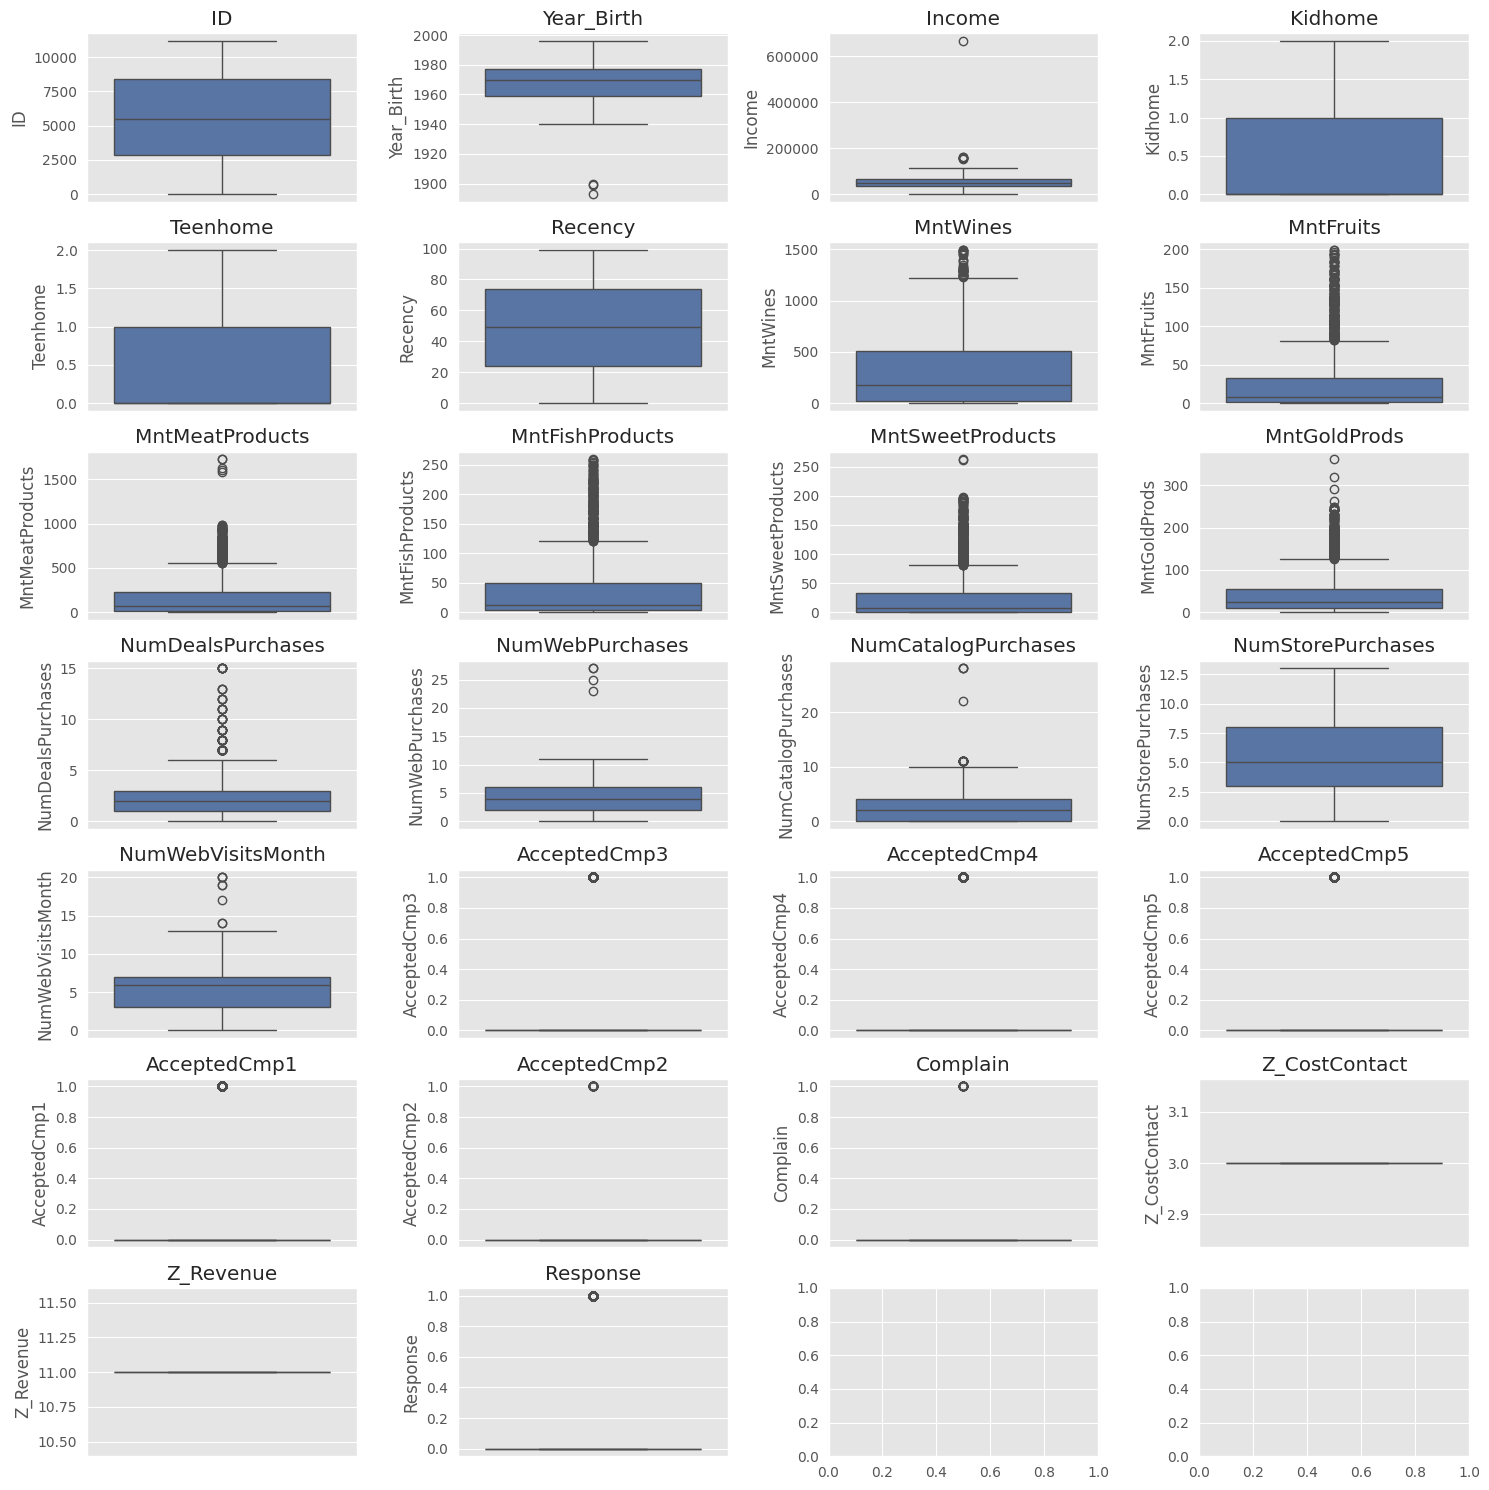

In [10]:
# Con esto visualizaremos la identificacion de outliers como valores atipicos potenciales:
# Lo que primero necesitamos son todas las columnas excluyendo lo del type = 'object'

int_cols = df.select_dtypes(exclude='object').columns
# Haremos un subplots para todo nuestros boxplots para poder entenderlo mas rapido, para ello especificaremos num_plots como n_rows:
n_plots = len(int_cols)
n_rows = 7
# Aca estamos haciendo '//' divisiones enteras, en caso tenga residuo se le aumenta 1 +.
cols = n_plots // n_rows + (n_plots % n_rows > 0)
# Para graficar usaremos subplots con nuestros valores de filas y plots ya calculados
fig, axes = plt.subplots(n_rows, cols, figsize = (15,15))

# Pondremos un iterados el cual estara por 'int_cols'
for _, col in enumerate(int_cols):
  ax = axes[_//cols, _%cols] if n_rows > 1 else axes[_%n_rows]
  sns.boxplot(data= df, y= col, ax=ax)
  ax.set_title(col)
plt.tight_layout()
plt.show()

# 3.3 Hallando la correlacion

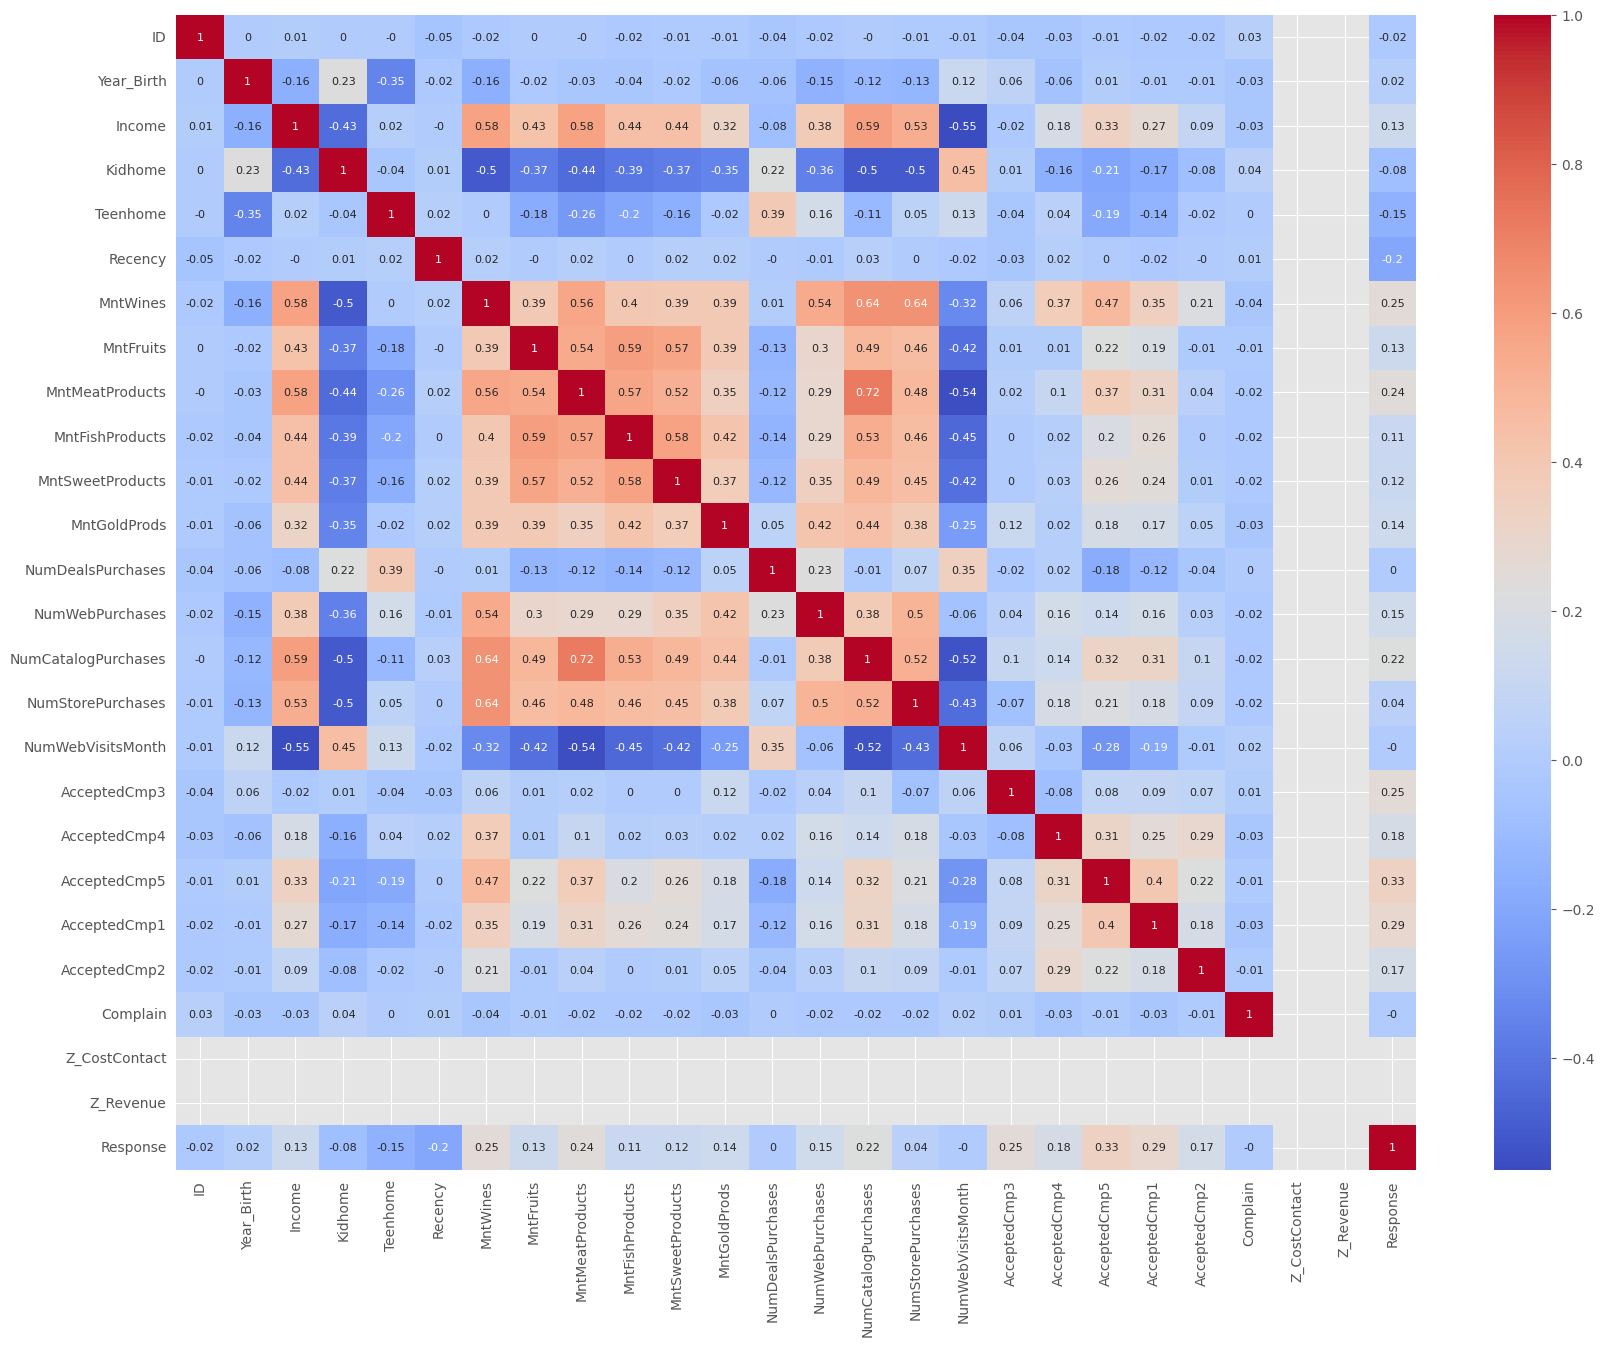

In [11]:
# Para hallar la correlacion, recurrimos a un mapa de calor de la libreria de seaborn
fig = plt.figure(figsize = (20,15))
sns.heatmap(data=df.select_dtypes(exclude='object').corr().round(2), annot = True, annot_kws= {'size': 8}, cmap= 'coolwarm')
plt.show()

In [12]:
# De aca podemos apreciar que hay dos datos que no estan siendo relevante, esto es por los valores constantes que estos tienen.
# Por ello lo borraremos momentaneamente para las futuras toma de datos.
df_marketing = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
df_marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# 3.4 Distribucion de las variables categoricas

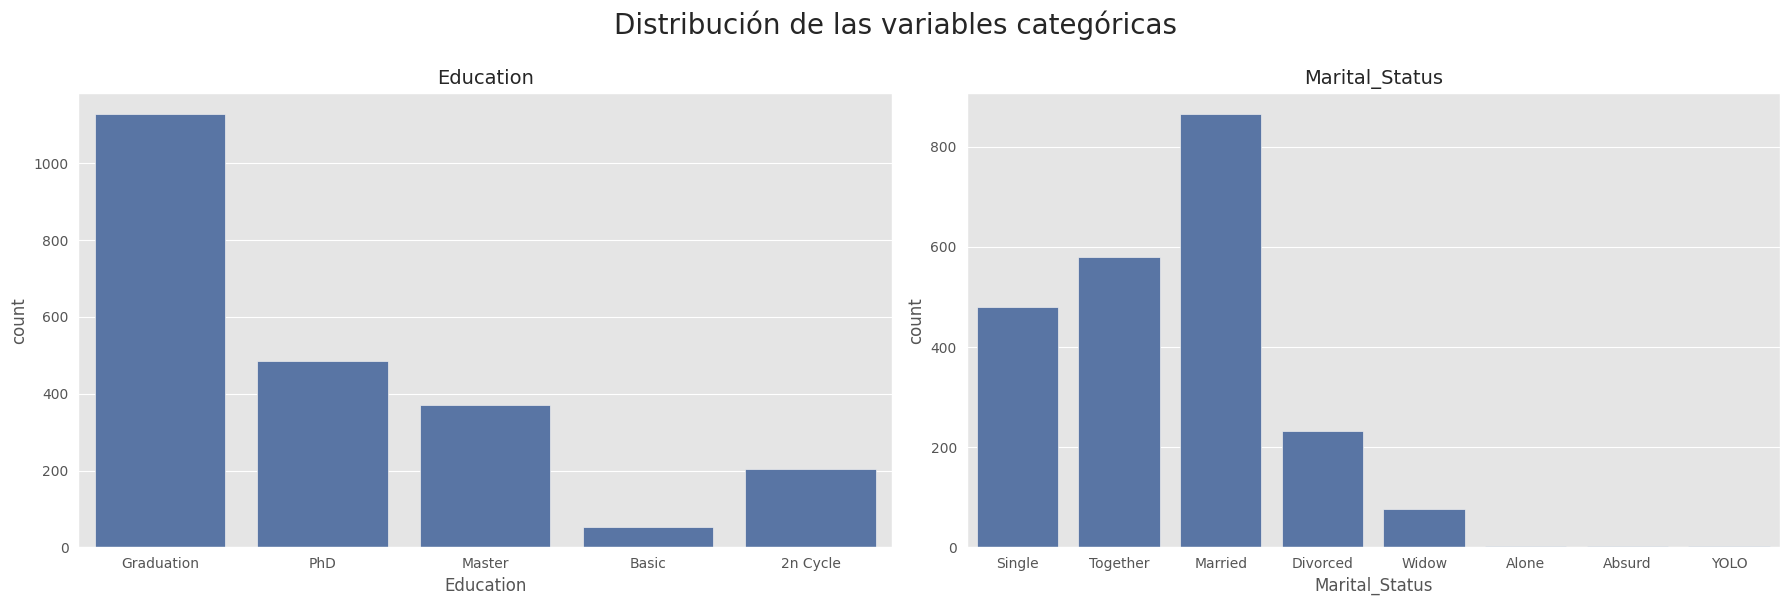

In [44]:
# Las variables categorias son 3: 'Education', 'Marital_Status', 'Dt_customer', pero el ultimo hemos decidido no graficarla.
cols = ['Education', 'Marital_Status']

n_plots = len(cols)
rows = 1
# Aca estamos haciendo '//' divisiones enteras, en caso tenga residuo se le aumenta 1 +.
cool = n_plots // rows + (n_plots % rows > 0)

fig, axs = plt.subplots(nrows=rows, ncols=cool, figsize=(18, 6))
fig.suptitle('Distribución de las variables categóricas', fontsize=20, y=1.0)

for i, col in enumerate(cols):
    ax = axs[i // cool, i % cool] if rows > 1 else axs[i % cool]
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(col, fontsize = 14)

plt.tight_layout()
plt.show()

# 3.5 Relacion entre las variables categorias y el tener niños en casa

In [15]:
# Primero para ello, tenemos que colocar que el 'kidhome', tenga valores de si o no
# En este caso cuando diga que tiene 0 hijos se colocara como que no, y cuando tenga otro valor se colocara como si.
mapping = {0: 'No', 1:'Si', 2:'Si'}

# Creamos un dataframe con ayuda del map() para aplicar el mapeo correspondiente.
df['kidhome2'] = df['Kidhome'].map(mapping)

# En caso tenga valores nulos
df['kidhome2'].fillna('No', inplace = True)

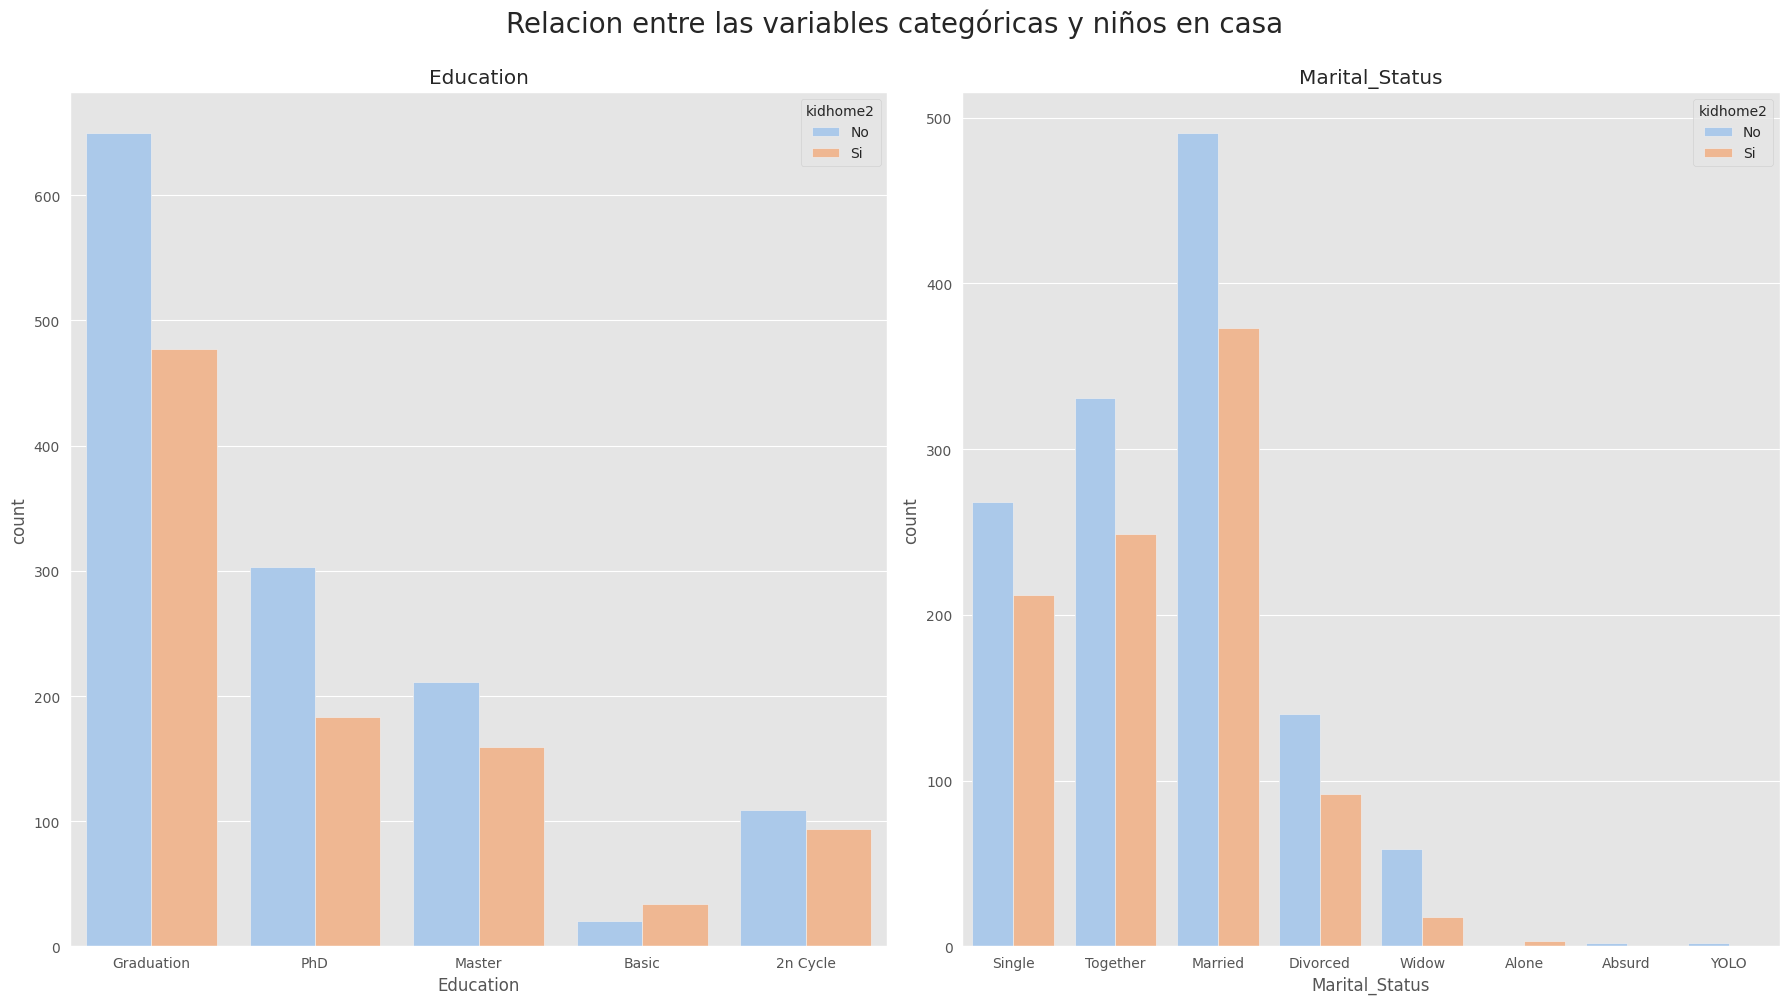

In [43]:
col_categoricas = ['Education', 'Marital_Status']

n_plots = 2
rows = 1
cols = n_plots // rows + (n_plots % rows)
fig , axs = plt.subplots(ncols = cols, nrows = 1, figsize=(18,10))
fig.suptitle('Relacion entre las variables categóricas y niños en casa', fontsize=20, y=1.0)

for i, col in enumerate (col_categoricas):
  ax = axs(i // cols, i % cols) if rows > 1 else axs[i % cols]
  sns.countplot(data = df, x = col, ax = ax, hue = 'kidhome2', palette = 'pastel')
  ax.set_title(col)

plt.tight_layout()
plt.show()

# 3.6 Distribucion de las variables numericas

Media de Income: 52247.25135379061
Media de Recency: 49.109375
Media de MntWines: 303.9357142857143
Media de MntFruits: 26.302232142857143
Media de MntMeatProducts: 166.95
Media de MntFishProducts: 37.52544642857143
Media de MntSweetProducts: 27.06294642857143
Media de MntGoldProds: 44.021875
Media de NumDealsPurchases: 2.325
Media de NumWebPurchases: 4.084821428571429
Media de NumCatalogPurchases: 2.6620535714285714
Media de NumStorePurchases: 5.790178571428571
Media de NumWebVisitsMonth: 5.316517857142857


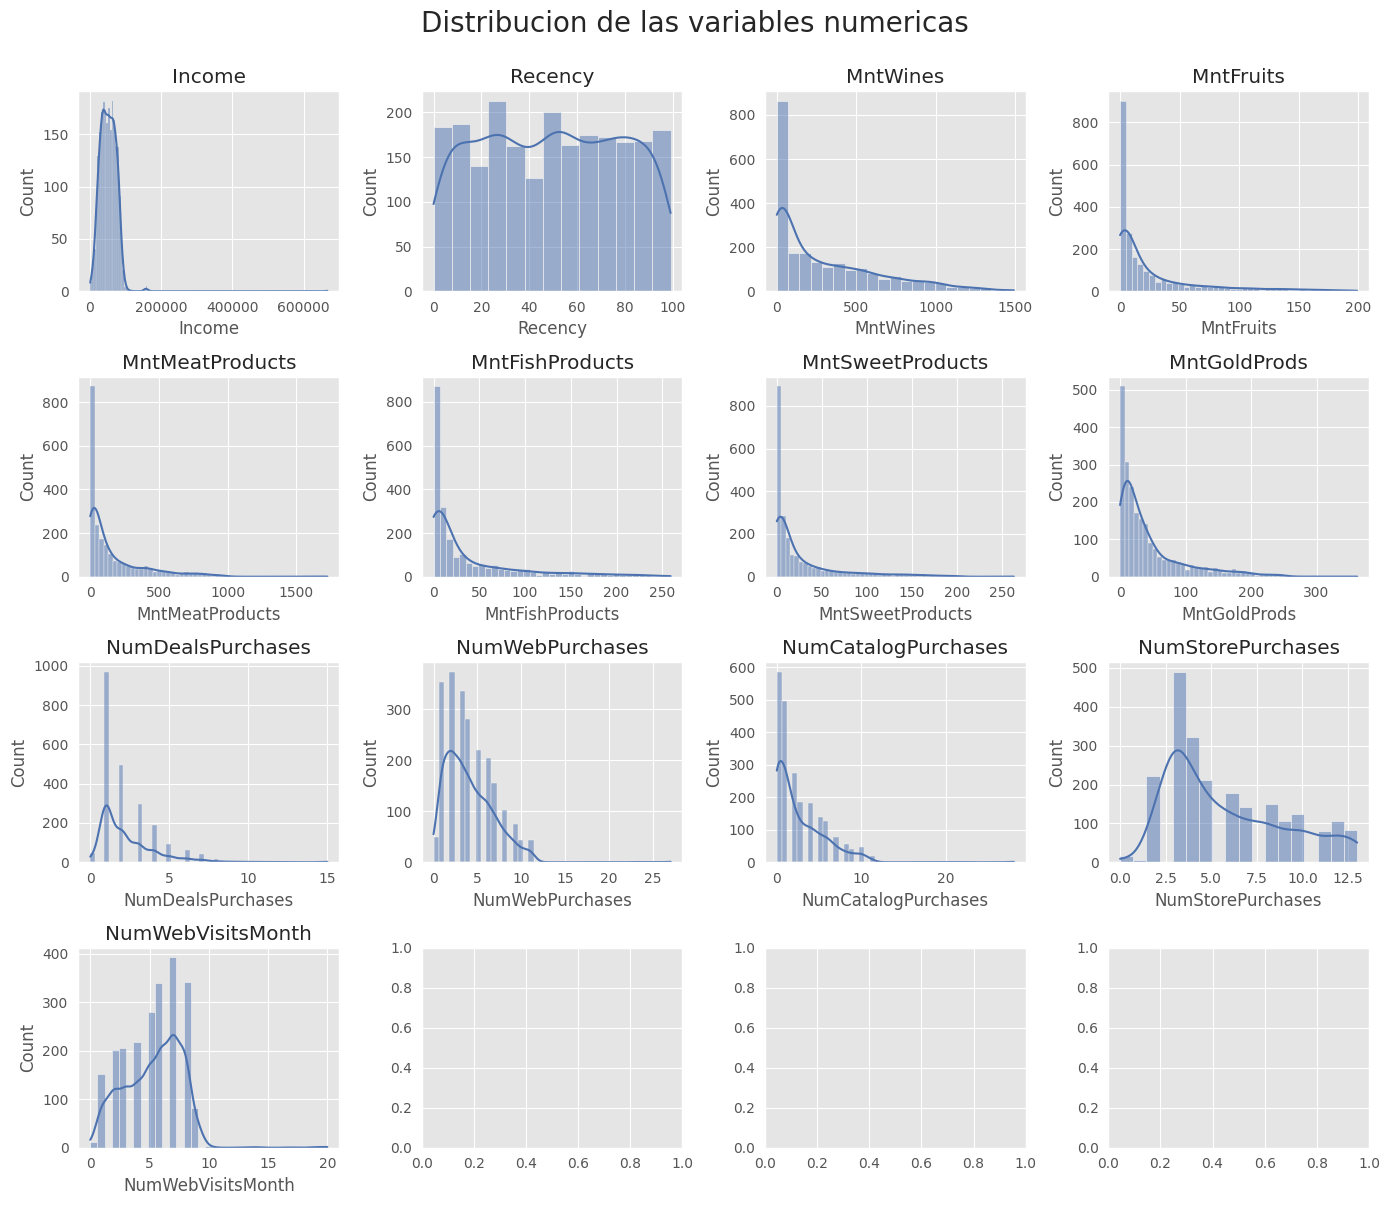

In [17]:
df_numericas = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                   'NumWebVisitsMonth']
nplots = len(df_numericas)
rows = 4
cols = nplots // rows + (nplots % rows)
fig , axs = plt.subplots(nrows = rows, ncols = cols, figsize=(14,12))
fig.suptitle('Distribucion de las variables numericas', fontsize = 20, y = 1.0 )

for i, col in enumerate(df_numericas):
  ax = axs[i // cols, i % cols] if rows > 1 else axs[i % cols]
  sns.histplot(data = df, x = col, ax=ax, kde=True)
  ax.set_title(col)
  print(f'Media de {col}: {df[col].mean()}')

plt.tight_layout()
plt.show()

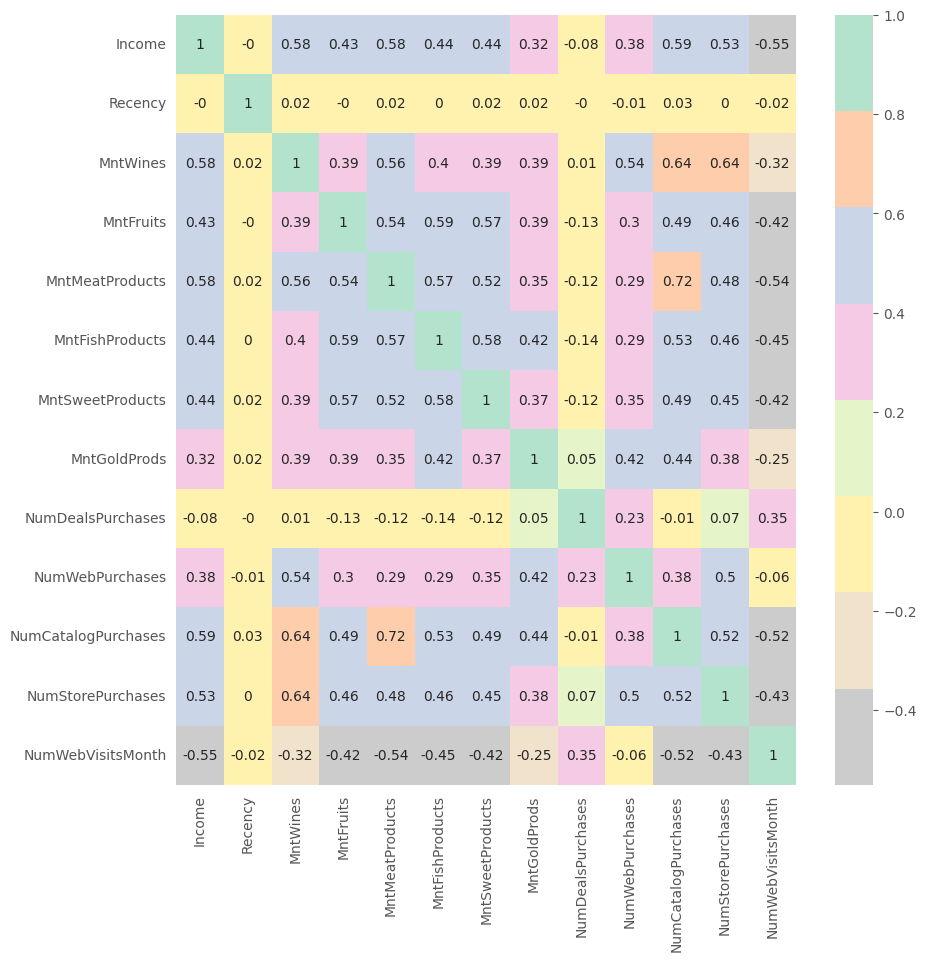

In [18]:
# Hallamos la correlacion de las variables numerica mediante un mapa de calor
plt.figure( figsize = (10,10))
sns.heatmap(data = df[df_numericas].corr().round(2), annot = True, annot_kws = {'size' : 10}, cmap= 'Pastel2_r')
plt.show()

# 3.7 Relacion entre las variables numericas y el tener niños en casa

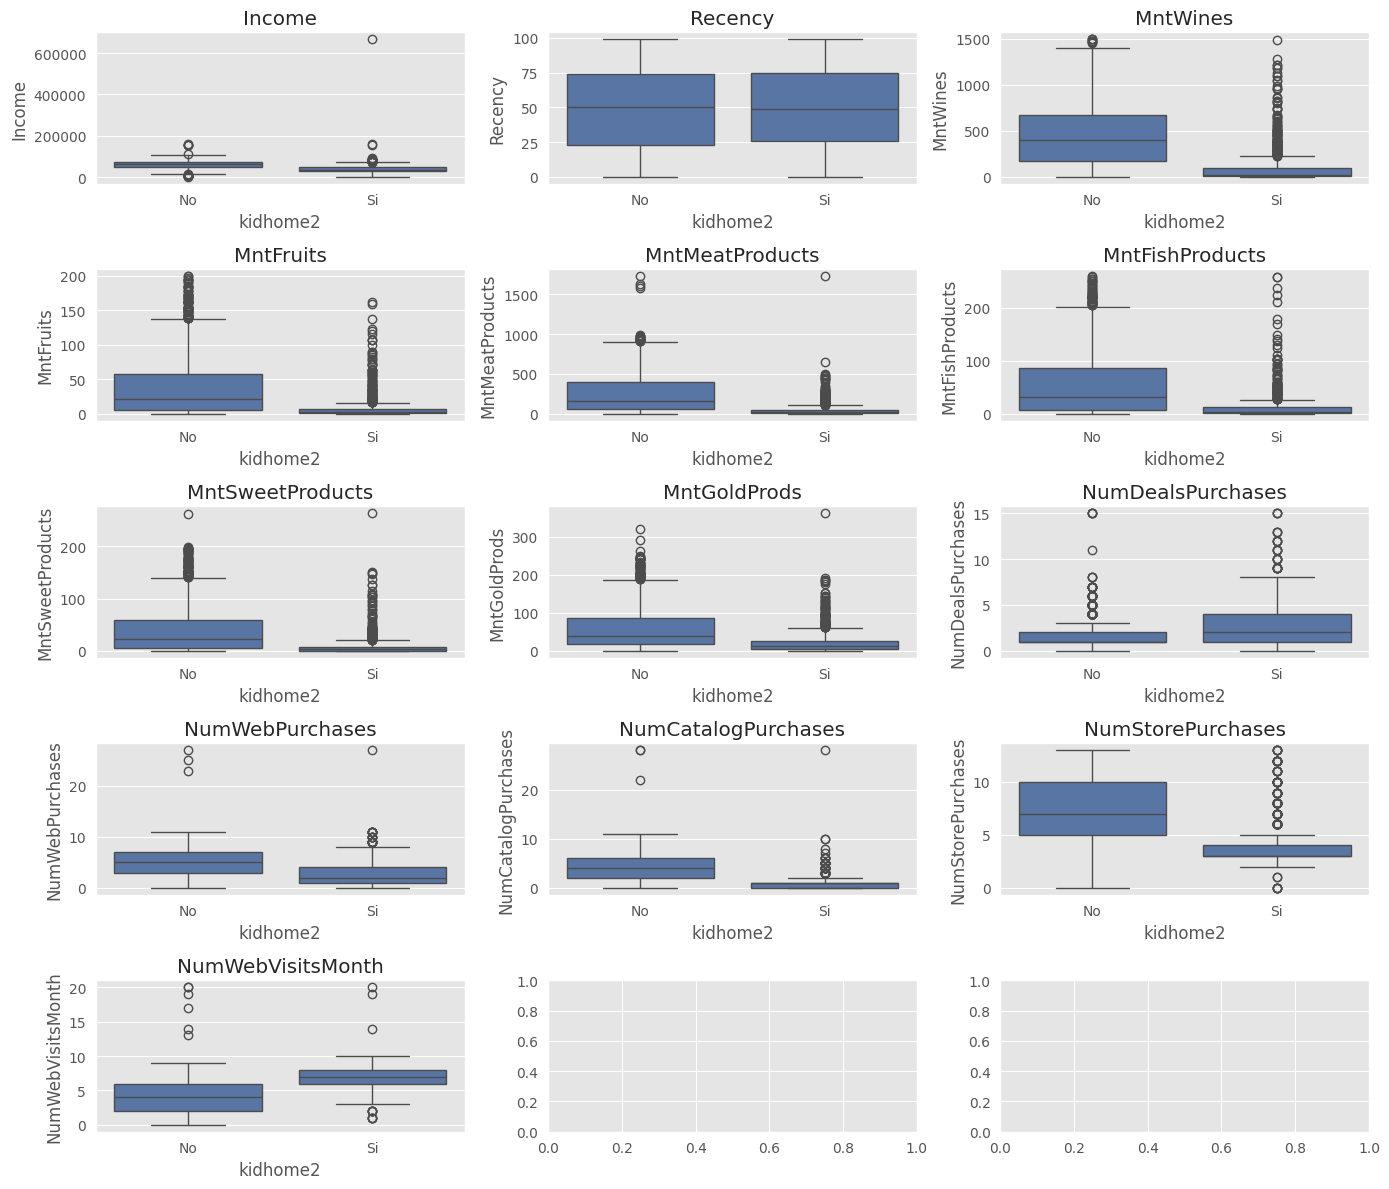

In [19]:
nplots = len(df_numericas)
rows = 5
cols = n_plots // rows + (nplots % rows)
fig, axs = plt.subplots(ncols = cols, nrows = rows, figsize=(14,12))

for i, col in enumerate (df_numericas):
  ax = axs[i // cols, i % cols] if rows > 1 else axs[i % cols]
  sns.boxplot(x = 'kidhome2', y = col, data = df, ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

# 3.8 Hallamos nuestra tasa de niño en casa (%)

In [20]:
total_ID = df['ID'].nunique()
total_kidhome = df[df['kidhome2'] == 'Si']['ID'].nunique()
kidhome_rate = total_kidhome / total_ID
kidhome_rate_percent = '{:.2%}'.format(kidhome_rate)
print('Tasa de niños en casa:', kidhome_rate_percent)

Tasa de niños en casa: 42.28%


# 3.9 Analisis especifico para responder nuestras preguntas

Luego de realizar un análisis exhaustivo de los datos, se pueden identificar que tanto influye o no el tener niños en casa. En primer lugar, podemos observar la compra de dulces, uno puede pensar que para una familia o persona que tenga niño, la compra de dulce debe ser alta, pero no es lo que pasa. asi como podemos observar si el tener niños infiere en la compra fisica o web, esto se realizo, porque uno cuando tiene hijos no siempre tiene el tiempo disponible y se desea saber que tanto afecta ello.

También podemos considerar otro factor, por ejemplo el tema del aprovechamiento de ofertas, al tener niños en casa uno siempre piensa en el ahorro por el gasto de estos mismos.

Pregunta : ¿Influye el tener un niño en casa del cliente con la compras en tienda fisica?

In [21]:
# Para responder esta pregunta usaremos una tabla de contingencia
cont_store = df.groupby('kidhome2')['NumStorePurchases'].sum().reset_index()
cont_store.set_index('kidhome2', inplace = True)
cont_store['percentil'] = (cont_store['NumStorePurchases']/cont_store['NumStorePurchases'].sum())*100
cont_store['percentil'] = cont_store['percentil'].round(2)
cont_store

,NumStorePurchases,percentil
kidhome2,,
No,9332,71.95
Si,3638,28.05


<Figure size 800x800 with 0 Axes>

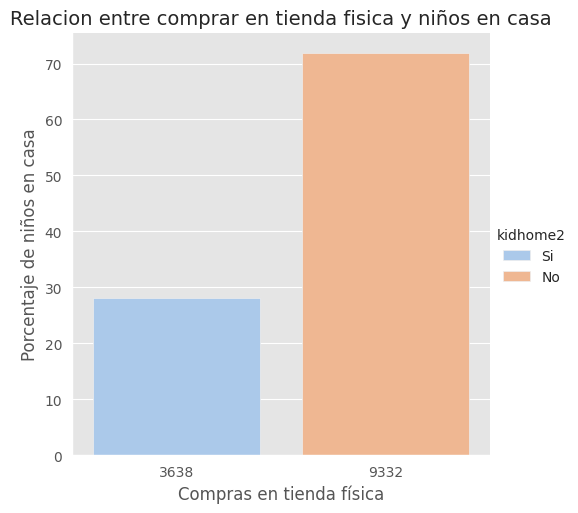

In [22]:
# Graficamos la relacion entre estos, para ello usamos el catplot para relacionar las variables categoricas y numericas
plt.figure(figsize= (8,8))
sns.catplot(data = cont_store, x = 'NumStorePurchases', y = 'percentil', hue='kidhome2', kind= 'bar', palette='pastel')
plt.title('Relacion entre comprar en tienda fisica y niños en casa', fontsize = 14)
plt.ylabel('Porcentaje de niños en casa')
plt.xlabel('Compras en tienda física')
plt.show()

¿Influye el tener un niño en casa del cliente con la compras en tienda virtual?

In [23]:
cont_web = df.groupby('kidhome2')['NumWebPurchases'].sum().reset_index()
cont_web.set_index('kidhome2', inplace = True)
cont_web['percentil'] = (cont_web['NumWebPurchases']/cont_web['NumWebPurchases'].sum())*100
cont_web['percentil'] = cont_web['percentil'].round(2)
cont_web

,NumWebPurchases,percentil
kidhome2,,
No,6431,70.28
Si,2719,29.72


<Figure size 1000x1000 with 0 Axes>

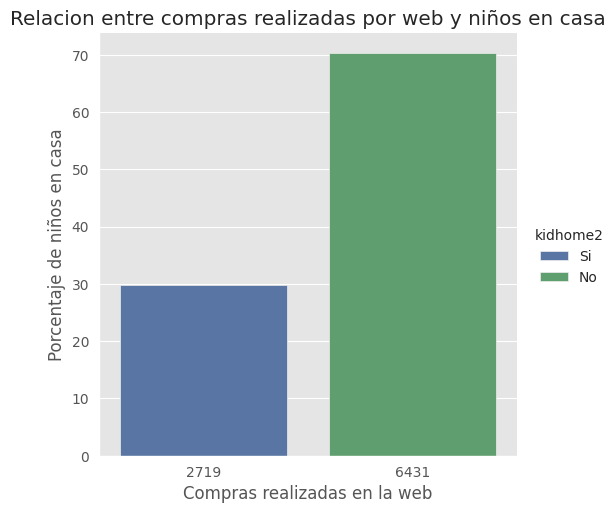

In [24]:
plt.figure(figsize= (10,10))
sns.catplot(data=cont_web, x= 'NumWebPurchases', y = 'percentil', kind= 'bar', hue= 'kidhome2')
plt.title('Relacion entre compras realizadas por web y niños en casa')
plt.xlabel('Compras realizadas en la web')
plt.ylabel('Porcentaje de niños en casa')
plt.show()

¿Tener un niño en casa aumenta en la compra de productos con dulce?

In [25]:
cont_sweet = df.groupby('kidhome2')['MntSweetProducts'].sum().reset_index()
cont_sweet.set_index('kidhome2', inplace = True)
cont_sweet['percentil'] = (cont_sweet['MntSweetProducts']/cont_sweet['MntSweetProducts'].sum())*100
cont_sweet['percentil'] = cont_sweet['percentil'].round(2)
cont_sweet

,MntSweetProducts,percentil
kidhome2,,
No,52365,86.38
Si,8256,13.62


Text(0.5, 1.0, 'Relacion entre la compra de dulces y tener niños en casa')

<Figure size 1000x1000 with 0 Axes>

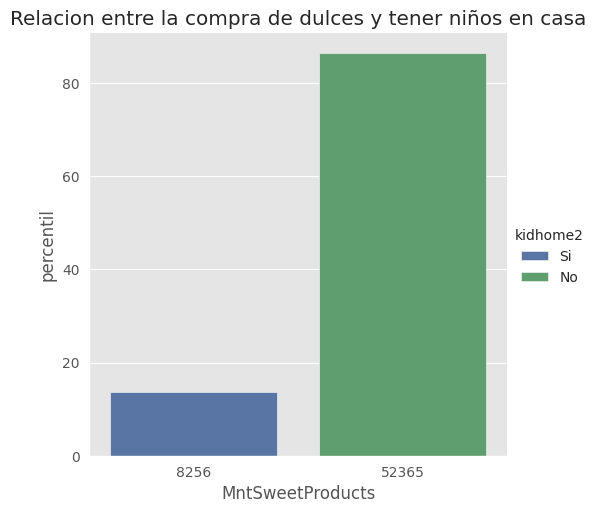

In [26]:
plt.figure(figsize = (10,10))
sns.catplot(data = cont_sweet, kind= 'bar', x = 'MntSweetProducts', y = 'percentil', hue='kidhome2')
plt.title('Relacion entre la compra de dulces y tener niños en casa')

Podemos observar que de los graficos y tablas realizadas podemos afirmar que los clientes que no tienen niños compran mas dulces y la afluencia de publico no va a depender de tener un niño en casa como el de las compras virtuales.

En conclusión, el tener un niño en casa no afecta a la compra de cierto viveres, ni a la demanda de publico, esto debe de ser tratado en el tema de camapañas, ahi tendria que haber un determinado aumento.

Pregunta: ¿Influye el tener un niño en casa del cliente con la compras en tienda fisica?

Cuando se realizó el analisis correspondiente a los clientes que tienen un niño en casa, se tuvo como resultado que al tenerlo no tiene un impacto mayor para la rentabilidad de la empresa, la respuesta es no, pero esto tiende a variar segun las temporadas, al tener esta solo esta información podemos decir que no inluyer el tener un niño en casa para la compra en tienda fisica.

Pregunta: ¿Influye el tener un niño en casa del cliente con la compras en tienda virtual?

Esta respuesta es la misma que pasa con la compra en tienda fisica, en conclusión, el tener niños en caso no influye tanto para la compra de viveres.

Pregunta: ¿Tener un niño en casa aumenta en la compra de productos con dulce?

Por poco creíble que parezca, no aumenta la demanda de los dulces al tener un niño en casa, esto esta comprobado en el grafico de arriba como cuadro de contingencia. Y digo que es algo poco creíble porque uno cuando tiene un niño en casa, este tiende a solicitar mas de estos tipos de productos.

# 3.10 Informe sobre el analisis de la tasa de tener un niño en casa

  En primer lugar se identificaron algunas caracteristicas generales de nuestro conjunto de datos, de los cuales estos tienen 2240 observacion y 29 variables, con esta informacion nos ayudó a poder corroborar y poder crear nuevas variables que nos ayuden a la resolucion de nuestras dudas y logro de objetivos trazados.

  Como se pudo visualizar nuestra tasa de niños en casa fue de 42.28 % del cual es casi la mitad de nuestro clientes registrados, asi mismo se calculo la media de nuestras variables numericas, siendo nuestro objetivo la compra entre tienda fisica y virtual (5.79 y 4.08 compra por dia respectivamente).

  Decidimos realizar una distribucion de nuestras variables categoricas, esto con respecto para saber que tanto influye el tener niños en casa. Se pudo observar, que de este 42.28 % es de gente graduada como gente casada.

  Asi mismo, se realizó una distribución de nuestra variables numéricas, aqui, si tenemos que explayarnos; ya que nos dimos cuenta que el tener niño en casa no influye en la compra de dulces, como nos habiamos proyectado en un principio, en consecuente tampoco llega a influir significativamente en la manera de compra del cliente, ya sea fisica o virtualmente.

  En conclusión podemos afirmar que el tener niño no es un factor importante en la compra de determinados productos como el de dulces, aun asi, esto no podemos afirmarlo tan deliberadamente; puesto que, nuestros conjuntos de datos son de un determinado tiempo, tendriamos que tener un apartado para analizar la compra de estos en temporadas especificas. Tambien nos hemos percatado que los clientes que tienen niño en casa suelen buscar mas productos en oferta.

# 3.11 Tratamos de realizar la relacion entre la compra de productos con descuento y niños en casa

In [27]:
# Agrupar por 'kidhome2' y calcular la suma de 'NumDealsPurchases' y el tamaño del grupo
cont_oferta = df.groupby('kidhome2').agg({'NumDealsPurchases': 'sum', 'ID': 'size'}).reset_index()

# Renombrar la columna 'ID' a 'Count_NumDealsPurchases'
cont_oferta.rename(columns={'ID': 'Count_NumDealsPurchases'}, inplace=True)

# Establecer 'kidhome2' como índice
cont_oferta.set_index('kidhome2', inplace=True)

# Mostrar el DataFrame resultante
cont_oferta


,NumDealsPurchases,Count_NumDealsPurchases
kidhome2,,
No,2514,1293
Si,2694,947


<Figure size 1000x1000 with 0 Axes>

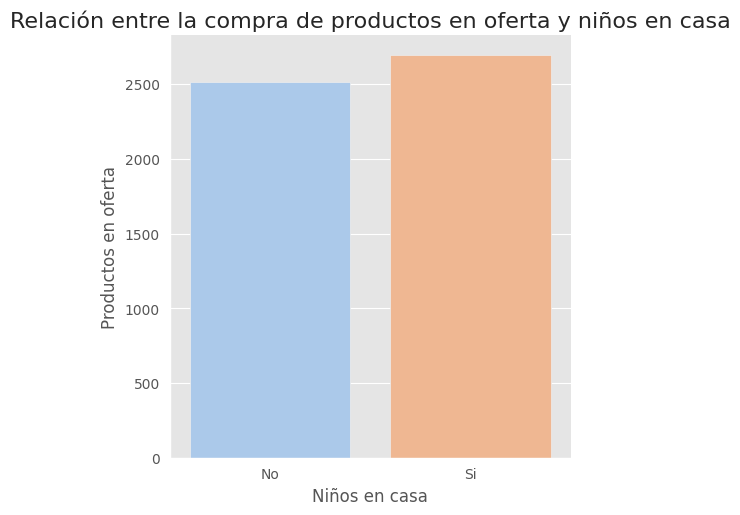

In [28]:
plt.figure( figsize =(10,10))
sns.catplot(x='kidhome2', y='NumDealsPurchases', hue='kidhome2', data=cont_oferta, kind='bar', palette='pastel')
plt.title('Relación entre la compra de productos en oferta y niños en casa', fontsize=16)
plt.xlabel('Niños en casa')
plt.ylabel('Productos en oferta')
plt.show()

Pregunta: ¿Si tienes niños en caso, adquieres mas productos en oferta?

Segun la tabla de contingencia podemos observar que las personas que tienen niños son menos, pero estoas personas compran mas productos en oferta. Por ende, nuestra hipotesis era correcta.

# 5. Entrenamiento y Testeo
--------------------------------------------------------------------------------

## 5.1. Division de datos

In [29]:
# Verificamos valores constantes; ya que puede puede ser perjudicial al momento de hacer nuestro entrenamiento y testeo
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
# Borramos estas columnas
df.drop(columns = constant_columns, inplace = True)

In [30]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
kidhome2                object
dtype: object

In [31]:
# Lista de columnas categóricas que deseas codificar
categorical_columns = ['Education', 'Marital_Status']

# Aplicar get_dummies solo a las columnas seleccionadas
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [32]:
# Entrenamiento y Testeo
X = df_encoded.drop(['kidhome2', 'ID', 'Dt_Customer'], axis = 1)
y = df_encoded['kidhome2']

# Conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

## 5.2 Entrenamiento y evaluación de modelos:

Los modelos elegidos fueron Árboles de decisión, Regresión Logística, Máquinas de Vectores de Soporte (SVM) y Redes Neuronales Artificiales

## 5.2.1 Modelo de árbol de decisión

In [33]:
# Modelo
dt = DecisionTreeClassifier(random_state = 42)

# Entrenamiento
dt.fit(X_train, y_train)

# Prediccion
y_pred = dt.predict(X_test)

# Precision
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='Si')

print('Precision del model de arbol de decision es :', accuracy)
print("F1 Score:", f1)

Precision del model de arbol de decision es : 1.0
F1 Score: 1.0


## 5.2.2 Regresión logística

In [34]:
# Modelo
lr = LogisticRegressionCV(cv =5, max_iter = 10000, random_state=42)

# Entrenamiento
lr.fit(X_train, y_train)

# Prediccion
y_pred = lr.predict(X_test)

#Precision
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='Si')

print('Precision del model de regresión logística es :', accuracy)
print("F1 Score:", f1)

Precision del model de regresión logística es : 1.0
F1 Score: 1.0


### 5.2.3 Máquinas de vectores de soporte (SVM)

In [35]:
# Modelo
svc = SVC()

# Entrenamiento
svc.fit(X_train, y_train)

# Prediccion
y_pred = svc.predict(X_test)

# Precision
accuracy = accuracy_score(y_test, y_pred)

print('Precision del modelo de SVM es: ', accuracy)

Precision del modelo de SVM es:  0.7455357142857143


### 5.2.4 Redes neuronales artificiales

In [36]:
# Modelo
nn = MLPClassifier(max_iter = 500)

# Entrenamiento
nn.fit(X_train, y_train)

# Prediccion
y_pred = nn.predict(X_test)

# Precision
accuracy = accuracy_score(y_test, y_pred)

print('Precision del modelo de redes neurnoales es: ', accuracy)

Precision del modelo de redes neurnoales es:  0.7723214285714286


## 5.3 Validación cruzada

In [37]:
num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

models = [
    ('Regresion Logistica', LogisticRegressionCV(max_iter=10000, solver = 'saga')),
    ('Arbol de Decision', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('Red Neuronal', MLPClassifier(max_iter=10000))
]

# Metricas
results = []
names = []
print('Metricas \n----------------------\n')
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {round(cv_results.mean(), 5)} ({round(cv_results.std(), 5)})')

Metricas 
----------------------

Regresion Logistica: 0.7963 (0.03225)
Arbol de Decision: 1.0 (0.0)
SVM: 0.78179 (0.02779)
Red Neuronal: 0.75273 (0.08966)


# **6. Optimización y selección de modelo**

In [38]:
# Hiperparámetros
params = [{'Regresion Logistica__Cs': [1, 10],
        'Regresion Logistica__penalty': ['l1', 'l2'],
        'Regresion Logistica__solver': ['liblinear']},

        {'Arbol de Decision__max_depth': [2, 4, 6],
        'Arbol de Decision__min_samples_split': [2, 4, 6]},

        {'SVM__C': [0.1, 1, 10],
        'SVM__kernel': ['linear', 'rbf']},

        {'Red Neuronal__hidden_layer_sizes': [(10,), (50,), (100,)],
        'Red Neuronal__activation': ['relu', 'logistic'],
        'Red Neuronal__alpha': [0.0001, 0.01, 0.1]}]


result = []
best_models = []
# Búsqueda de hiperparámetros para cada modelo
for i, (name, model) in enumerate(models):
    pipe = Pipeline([(name, model)])
    grid = GridSearchCV(pipe, params[i], cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
    grid.fit(X_train, y_train)

    best_model = (name, grid.best_estimator_)
    best_score = grid.best_score_
    best_models.append(best_model)
    result.append({'Modelo': name, 'Score': round(best_score, 5), 'Hiperparámetros': grid.best_params_})

    print(name + ':')
    print('Mejores parametros:', grid.best_params_)
    print('Precisión del entrenamiento:', round(grid.best_score_, 5))
    print('Precisión del test:', round(grid.score(X_test, y_test), 5))
    print('--------------------------------------------')

# Ordenamiento de los resultados
result = sorted(result, key=lambda k: k['Score'], reverse=True)
print('Orden de los modelos: ')
for res in result:
    print(res)

Regresion Logistica:
Mejores parametros: {'Regresion Logistica__Cs': 10, 'Regresion Logistica__penalty': 'l1', 'Regresion Logistica__solver': 'liblinear'}
Precisión del entrenamiento: 0.99944
Precisión del test: 1.0
--------------------------------------------
Arbol de Decision:
Mejores parametros: {'Arbol de Decision__max_depth': 2, 'Arbol de Decision__min_samples_split': 2}
Precisión del entrenamiento: 1.0
Precisión del test: 1.0
--------------------------------------------
SVM:
Mejores parametros: {'SVM__C': 0.1, 'SVM__kernel': 'linear'}
Precisión del entrenamiento: 0.87277
Precisión del test: 0.875
--------------------------------------------
Red Neuronal:
Mejores parametros: {'Red Neuronal__activation': 'logistic', 'Red Neuronal__alpha': 0.01, 'Red Neuronal__hidden_layer_sizes': (100,)}
Precisión del entrenamiento: 0.80524
Precisión del test: 0.78125
--------------------------------------------
Orden de los modelos: 
{'Modelo': 'Arbol de Decision', 'Score': 1.0, 'Hiperparámetros':

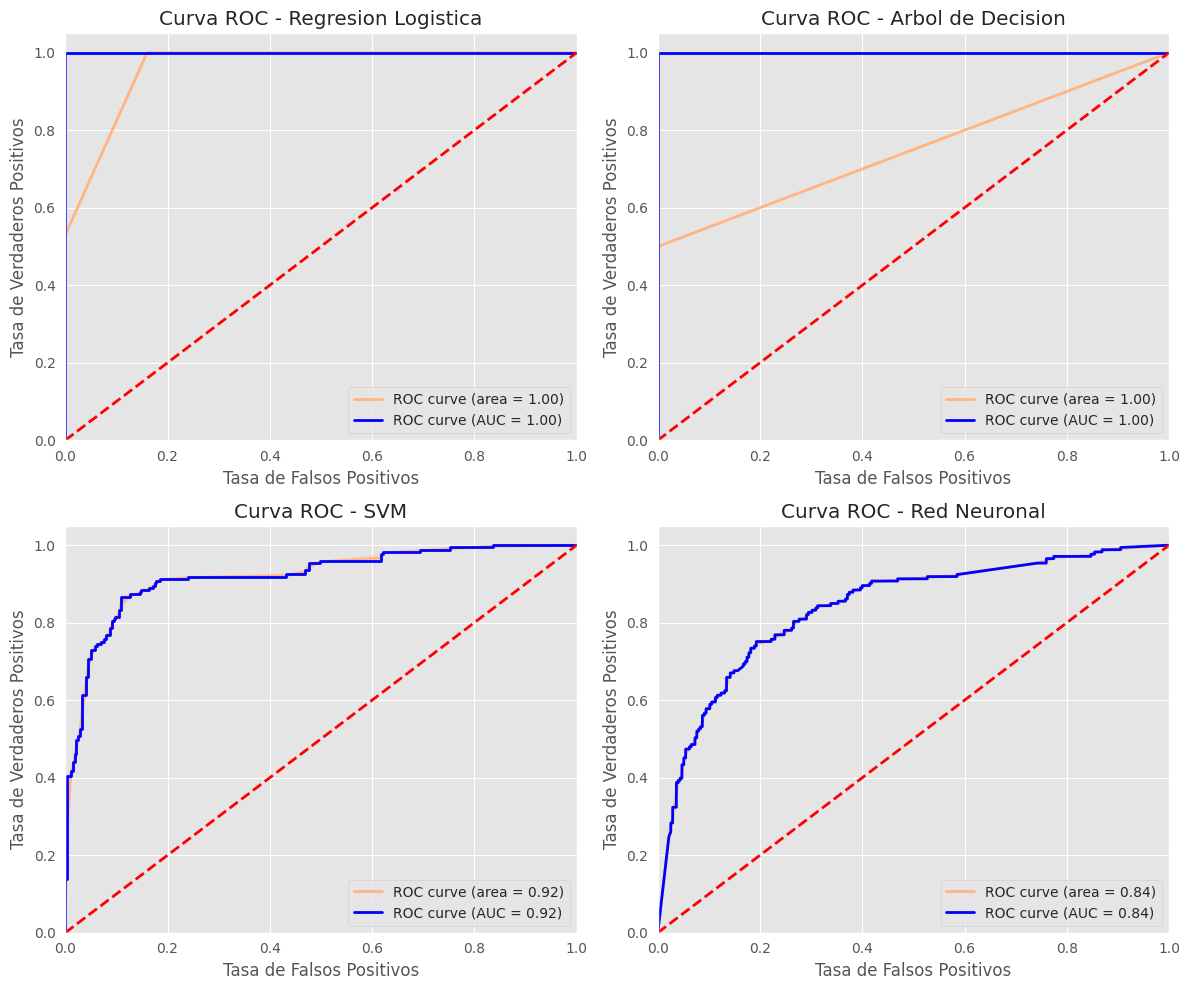

In [41]:
from sklearn.preprocessing import LabelEncoder

# Convertir y_test a formato numérico
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)

# Crear subplots para los gráficos
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axs = axs.flatten()

# Iterar sobre cada modelo y graficar la curva ROC
for i, (name, model) in enumerate(best_models):
    if name == 'SVM':
        # Obtener las puntuaciones de decisión en lugar de las probabilidades
        y_score = model.decision_function(X_test)
    else:
        # Obtener las predicciones probabilísticas del modelo
        y_score = model.predict_proba(X_test)[:, 1]

    # Calcular la curva ROC y el área bajo la curva (AUC)
    fpr, tpr, _ = roc_curve(y_test_numeric, y_score)
    roc_auc = auc(fpr, tpr)

    # Graficar la curva ROC
    df_temp = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
    colors = sns.color_palette('pastel')
    sns.lineplot(x='fpr', y='tpr', data=df_temp, color=colors[1], lw=2, label='ROC curve (area = %0.2f)' % roc_auc, ax=axs[i])
    axs[i].plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    axs[i].plot([0, 1], [0, 1], color='r', linestyle='--', lw=2)
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('Tasa de Falsos Positivos')
    axs[i].set_ylabel('Tasa de Verdaderos Positivos')
    axs[i].set_title(f'Curva ROC - {name}')
    axs[i].legend(loc="lower right")

plt.tight_layout()
plt.show()

# **7. Conclusión**

---

En el presente proyecto fue un muy interesante plantearle, asi mismo como un rompe mitos para los que dicen que tener niño en casa influye en ciertas cosas, como compra de viveres como numero de visitas, ya sea por la web como en tienda fisica. Esto por el poco tiempo que se manejan, lo que si se evidenció, fue un aumento de compras en productos con descuento. Esto a pesar de ser menos personas que tengan niños en casa, compran mas de estos productos; ya que, al ser un poco intutiutivos, se puede deducir que es para un ahorro, o aprovechamiento de ofertas en las distintas categorias.

Se aplicaron cuatro modelos de aprendizaje supervisado para predecir la tasa de abandono de los clientes: Regresión Logística, Árbol de Decisión, SVM y Red Neuronal. Después de la optimización de hiperparámetros, se encontró que el modelo SVM tuvo el mejor desempeño en términos de precisión de prueba, seguido por Regresión Logística y Red Neuronal.

En conclusión, el análisis exploratorio de datos y los modelos de aprendizaje supervisado aplicados en este proyecto proporcionan una valiosa herramienta poder saber en donde atacar al momento de hacer un espacio publicitario o ofertas catorcenales, dependiendo de lo que se busca aumentar, en este caso, el tener niños en casa no influye mucho en las compras de ciertas categorias. Tambien identificamos que el tener niño en casa, las personas aprovechan mas los productos con descuento, ahi tenemos una estrategia para poder llevara a cabo un aumento en ciertos KPI de la compañia.